In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [348]:
# Construiremos estadísticas descriptivas:
parcels = pd.read_pickle('./aux_data/parcels_melo.pkl')

In [349]:
parcels.columns

Index(['PIN', 'Property Class', 'Tax Year', 'Neighborhood Code',
       'Land Square Feet', 'Town Code', 'Type of Residence', 'Apartments',
       'Wall Material', 'Roof Material', 'Rooms', 'Bedrooms', 'Basement',
       'Basement Finish', 'Central Heating', 'Other Heating', 'Central Air',
       'Fireplaces', 'Attic Type', 'Attic Finish', 'Half Baths', 'Design Plan',
       'Cathedral Ceiling', 'Construction Quality', 'Renovation',
       'Site Desireability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area', 'Porch',
       'Other Improvements', 'Building Square Feet', 'Repair Condition',
       'Multi Code', 'Number of Commercial Units',
       'Prior Tax Year Market Value Estimate (Land)',
       'Prior Tax Year Market Value Estimate (Building)', 'Sale Date',
       'Deed No.', 'Sale Price', 'Longitude', 'Latitude', 'Census Tract',
       'Total Building Square Fe

In [350]:
parcels.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22322 entries, 0 to 22321
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   PIN                                              22322 non-null  int64   
 1   Property Class                                   22322 non-null  int64   
 2   Tax Year                                         22322 non-null  int64   
 3   Neighborhood Code                                22322 non-null  int64   
 4   Land Square Feet                                 22322 non-null  int64   
 5   Town Code                                        22322 non-null  int64   
 6   Type of Residence                                13044 non-null  float64 
 7   Apartments                                       13044 non-null  float64 
 8   Wall Material                                    13044 non-null  float64 
 9   Roof Mate

In [351]:
parcels.head()

,PIN,Property Class,Tax Year,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Other Heating,Central Air,Fireplaces,Attic Type,Attic Finish,Half Baths,Design Plan,Cathedral Ceiling,Construction Quality,Renovation,Site Desireability,Garage 1 Size,Garage 1 Material,Garage 1 Attachment,Garage 1 Area,Garage 2 Size,Garage 2 Material,Garage 2 Attachment,Garage 2 Area,Porch,Other Improvements,Building Square Feet,Repair Condition,Multi Code,Number of Commercial Units,Prior Tax Year Market Value Estimate (Land),Prior Tax Year Market Value Estimate (Building),Sale Date,Deed No.,Sale Price,Longitude,Latitude,Census Tract,Total Building Square Feet,Multi Property Indicator,Property Address,Modeling Group,Full Baths,Age,Use,Number of Units,Percent Ownership,Condo Class Factor,Multi-Family Indicator,Large Lot,Assessed Value,geometry,block
0,5333030140000,234,2018,11,2850,17,4.000,0.000,2.000,1.000,6.000,3.000,3.000,1.000,1.000,5.000,1.000,0.000,3.000,nan,0.000,2.000,0.000,2.000,NaN,2.000,7.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,nan,0.000,1211.000,2.000,2.000,0.000,25650,175630,NaN,nan,nan,-87.730,42.068,808900,nan,0,2747 CRAWFORD AVE EVANSTON,SF,2,58,1,1,1.000,nan,nan,0,179610.000,POINT (-87.72999 42.06823),39425
1,5333030150000,234,2018,11,2850,17,4.000,0.000,2.000,1.000,6.000,3.000,3.000,1.000,1.000,5.000,1.000,0.000,3.000,nan,0.000,2.000,0.000,2.000,NaN,2.000,7.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,nan,0.000,1211.000,2.000,2.000,0.000,25650,175630,NaN,nan,nan,-87.730,42.068,808900,nan,0,2747 CRAWFORD AVE EVANSTON,SF,2,58,1,1,1.000,nan,nan,0,179610.000,POINT (-87.72994 42.06817),39425
2,5333030160000,234,2018,11,2850,17,4.000,0.000,3.000,1.000,6.000,3.000,3.000,1.000,1.000,5.000,1.000,0.000,3.000,nan,0.000,2.000,2.000,2.000,NaN,2.000,7.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,nan,0.000,1243.000,2.000,2.000,0.000,25650,177250,NaN,nan,nan,-87.730,42.068,808900,nan,0,3465 CLIFFORD ST EVANSTON,SF,2,58,1,1,1.000,nan,nan,0,179940.000,POINT (-87.72989 42.06811),39425
3,5333030170000,234,2018,11,2850,17,4.000,0.000,3.000,1.000,6.000,3.000,3.000,1.000,1.000,5.000,1.000,0.000,3.000,nan,0.000,2.000,2.000,2.000,NaN,2.000,7.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,nan,0.000,1243.000,2.000,2.000,0.000,25650,177250,NaN,nan,nan,-87.730,42.068,808900,nan,0,3465 CLIFFORD ST EVANSTON,SF,2,58,1,1,1.000,nan,nan,0,179940.000,POINT (-87.72985 42.06805),39425
4,5333030180000,203,2018,11,9505,17,5.000,0.000,1.000,1.000,5.000,2.000,1.000,3.000,1.000,5.000,2.000,0.000,1.000,1.000,1.000,2.000,2.000,2.000,NaN,2.000,3.000,1.000,2.000,2.000,7.000,0.000,0.000,0.000,1.000,0.000,1206.000,2.000,2.000,0.000,85540,259410,NaN,nan,nan,-87.730,42.069,808900,nan,0,3628 GLENVIEW RD EVANSTON,SF,1,90,1,1,1.000,nan,nan,0,416650.000,POINT (-87.73021 42.06910),39425


In [352]:
(parcels.isna().sum()/len(parcels.index)).sort_values(ascending = False).head(42) # El 88.8% de nuestra variable y tiene NAs ajaja que mierda

Multi-Family Indicator       1.000
Renovation                   0.998
Total Building Square Feet   0.977
Sale Date                    0.880
Deed No.                     0.880
Sale Price                   0.880
Porch                        0.855
Attic Finish                 0.719
Condo Class Factor           0.584
Garage 2 Material            0.416
Garage 1 Area                0.416
Garage 2 Area                0.416
Garage 2 Attachment          0.416
Other Heating                0.416
Garage 2 Size                0.416
Garage 1 Material            0.416
Garage 1 Attachment          0.416
Building Square Feet         0.416
Garage 1 Size                0.416
Site Desireability           0.416
Construction Quality         0.416
Cathedral Ceiling            0.416
Design Plan                  0.416
Half Baths                   0.416
Attic Type                   0.416
Other Improvements           0.416
Number of Commercial Units   0.416
Repair Condition             0.416
Rooms               

In [353]:
parcels.describe()

,PIN,Property Class,Tax Year,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Other Heating,Central Air,Fireplaces,Attic Type,Attic Finish,Half Baths,Design Plan,Cathedral Ceiling,Construction Quality,Site Desireability,Garage 1 Size,Garage 1 Material,Garage 1 Attachment,Garage 1 Area,Garage 2 Size,Garage 2 Material,Garage 2 Attachment,Garage 2 Area,Porch,Other Improvements,Building Square Feet,Repair Condition,Multi Code,Number of Commercial Units,Prior Tax Year Market Value Estimate (Land),Prior Tax Year Market Value Estimate (Building),Deed No.,Sale Price,Longitude,Latitude,Census Tract,Total Building Square Feet,Multi Property Indicator,Full Baths,Age,Use,Number of Units,Percent Ownership,Condo Class Factor,Multi-Family Indicator,Large Lot,Assessed Value
count,22322.000,22322.000,22322.000,22322.000,22322.000,22322.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,6281.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,3232.000,13044.000,13044.000,13044.000,13044.000,13044.000,22322.000,22322.000,2685.000,2685.000,22322.000,22322.000,22322.000,512.000,22322.000,22322.000,22322.000,22322.000,22322.000,22322.000,9278.000,0.000,22322.000,22304.000
mean,10203662944576.461,249.146,2018.000,87.929,18459.618,17.000,2.250,0.335,2.046,1.364,7.622,3.752,1.466,2.501,1.342,4.982,1.543,0.604,2.249,2.024,0.566,1.919,1.218,1.974,1.999,3.850,0.997,1.293,1.377,6.981,0.005,0.007,0.008,1.101,41.621,2060.008,1.989,2.048,0.010,47350.088,293498.189,1767398357.650,398542.285,-87.692,42.044,809578.478,4681.609,0.023,1.455,53.122,1.079,41.235,0.620,294.561,nan,0.093,396745.105
std,1691681225932.229,45.528,0.000,59.191,28076.901,0.000,1.202,0.918,0.939,1.082,2.958,1.449,0.858,0.858,0.482,0.230,0.498,0.724,0.852,0.988,0.591,0.369,0.970,0.186,0.059,2.177,0.845,0.869,0.885,0.305,0.089,0.120,0.125,0.302,1209.025,1105.636,0.169,0.228,0.138,50687.649,226906.910,52228209.275,350052.668,0.014,0.014,496.976,2323.530,0.150,0.775,42.477,0.270,106.499,0.470,20.489,nan,0.290,320955.602
min,5333030140000.000,201.000,2018.000,11.000,20.000,17.000,1.000,0.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,364.000,1.000,2.000,0.000,10.000,0.000,1013426018.000,1.000,-87.732,42.019,808702.000,1608.000,0.000,1.000,1.000,1.000,1.000,0.000,200.000,nan,0.000,20.000
25%,10131090092500.000,205.000,2018.000,42.000,5213.000,17.000,2.000,0.000,1.000,1.000,6.000,3.000,1.000,2.000,1.000,5.000,1.000,0.000,1.000,1.000,0.000,2.000,0.000,2.000,2.000,3.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,1.000,0.000,1290.000,2.000,2.000,0.000,9792.500,143105.000,1718608211.000,180000.000,-87.701,42.032,809100.000,3092.250,0.000,1.000,10.000,1.000,1.000,0.040,299.000,nan,0.000,187990.000
50%,11071000201009.500,211.000,2018.000,80.000,8160.000,17.000,2.000,0.000,2.000,1.000,7.000,4.000,1.000,3.000,1.000,5.000,2.000,0.000,3.000,2.000,1.000,2.000,2.000,2.000,2.000,3.000,1.000,2.000,2.000,7.000,0.000,0.000,0.000,1.000,0.000,1823.500,2.000,2.000,0.000,34420.000,247850.000,1736134060.000,310000.000,-87.689,42.044,809500.000,3811.000,0.000,1.000,58.000,1.000,1.000,1.000,299.000,nan,0.000,320000.000
75%,11192090137500.000,299.000,2018.000,120.000,19095.000,17.000,2.000,0.000,3.000,1.000,9.000,4.000,2.000,3.000,2.000,5.000,2.000,1.000,3.000,3.000,1.000,2.000,2.000,2.000,2.000,7.000,1.000,2.000,2.000,7.000,0.000,0.000,0.000,1.000,0.000,2508.250,2.000,2.000,0.000,71995.000,407575.000,1817341045.000,520000.000,-87.682,42.057,810000.000,6019.250,0.000,2.000,92.000,1.000,28.000,1.000,299.000,nan,0.000,542135.000
max,11302110131025.000,299.000,2018.000,220.000,220466.000,17.000,5.000,6.000,4.000,6.000,42.000,18.000,4.000,

In [354]:
parcels['Sale Price'].describe() # Estos datos iguales a 1 son pura feca. Esos se tienen que ir para la monda.

count      2685.000
mean     398542.285
std      350052.668
min           1.000
25%      180000.000
50%      310000.000
75%      520000.000
max     4550000.000
Name: Sale Price, dtype: float64


 media = 398542.28 y desviación = 349987.48



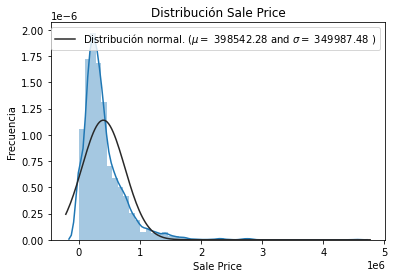

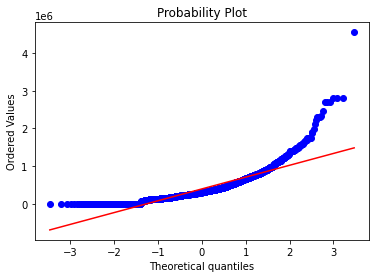

In [355]:
sns.distplot(parcels['Sale Price'].dropna(), fit=norm);

# Encontremos los parametros
(mu, sigma) = norm.fit(parcels['Sale Price'].dropna())
print( '\n media = {:.2f} y desviación = {:.2f}\n'.format(mu, sigma))

# Veamos esta wead
plt.legend(['Distribución normal. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frecuencia')
plt.title('Distribución Sale Price')

fig = plt.figure()
# stats.probplot: Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(parcels['Sale Price'].dropna(), plot=plt) # Mapa de probabilidades
plt.show()

In [356]:
# Rapidamente podemos ver 2 cosas! Nuestra variable de interés está desviada de la normal! Necesitamos transformarla. Tiene Skewness positiva (asimetría hacia la izquierda)
print("Skewness: %f" % parcels['Sale Price'].dropna().skew()) 
print("Kurtosis: %f" % parcels['Sale Price'].dropna().kurt()) # Las colas qué tanto se alejan de la normal

Skewness: 2.686383
Kurtosis: 14.719014


In [357]:
# Vamos a eliminar los datos menores o iguales a 1
[np.round(i, 3) for i in np.percentile(parcels['Sale Price'].dropna(), [1, 5, 6, 7, 8, 9, 10, 15, 85, 90, 95, 99])]

filtro = parcels['Sale Price'] <= 1

In [358]:
parcels['Sale Price'][filtro] = np.nan

In [359]:
parcels.isna().sum().sort_values(ascending = False).head(42)

Multi-Family Indicator        22322
Renovation                    22269
Total Building Square Feet    21810
Sale Price                    19849
Sale Date                     19637
Deed No.                      19637
Porch                         19090
Attic Finish                  16041
Condo Class Factor            13044
Garage 2 Material              9278
Garage 1 Area                  9278
Garage 2 Area                  9278
Garage 2 Attachment            9278
Other Heating                  9278
Garage 2 Size                  9278
Garage 1 Material              9278
Garage 1 Attachment            9278
Building Square Feet           9278
Garage 1 Size                  9278
Site Desireability             9278
Construction Quality           9278
Cathedral Ceiling              9278
Design Plan                    9278
Half Baths                     9278
Attic Type                     9278
Other Improvements             9278
Number of Commercial Units     9278
Repair Condition            

In [360]:
parcels['Sale Price'].isna().sum()/len(parcels['Sale Price']) # CASI TODA NUESTRA VARIABLE ES NAN QUE MIERDDA

0.8892124361616343

In [361]:
# Vamos a transformar la variable de interes como y = log(y + 1)
parcels['SalePrice_l'] = np.log1p(parcels['Sale Price'])


 media = 12.74 y desviación = 0.69



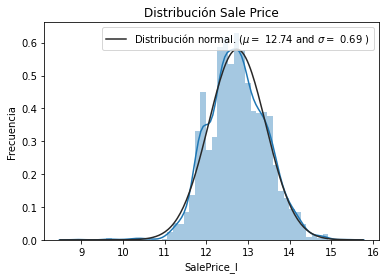

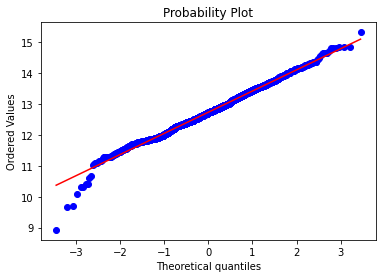

In [362]:
sns.distplot(parcels['SalePrice_l'].dropna(), fit=norm);

# Encontremos los parametros
(mu, sigma) = norm.fit(parcels['SalePrice_l'].dropna())
print( '\n media = {:.2f} y desviación = {:.2f}\n'.format(mu, sigma))

# Veamos esta wead
plt.legend(['Distribución normal. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frecuencia')
plt.title('Distribución Sale Price')

fig = plt.figure()
# stats.probplot: Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(parcels['SalePrice_l'].dropna(), plot=plt) # Mapa de probabilidades
plt.show()

In [363]:
parcels.describe()

,PIN,Property Class,Tax Year,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Other Heating,Central Air,Fireplaces,Attic Type,Attic Finish,Half Baths,Design Plan,Cathedral Ceiling,Construction Quality,Site Desireability,Garage 1 Size,Garage 1 Material,Garage 1 Attachment,Garage 1 Area,Garage 2 Size,Garage 2 Material,Garage 2 Attachment,Garage 2 Area,Porch,Other Improvements,Building Square Feet,Repair Condition,Multi Code,Number of Commercial Units,Prior Tax Year Market Value Estimate (Land),Prior Tax Year Market Value Estimate (Building),Deed No.,Sale Price,Longitude,Latitude,Census Tract,Total Building Square Feet,Multi Property Indicator,Full Baths,Age,Use,Number of Units,Percent Ownership,Condo Class Factor,Multi-Family Indicator,Large Lot,Assessed Value,SalePrice_l
count,22322.000,22322.000,22322.000,22322.000,22322.000,22322.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,6281.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,3232.000,13044.000,13044.000,13044.000,13044.000,13044.000,22322.000,22322.000,2685.000,2473.000,22322.000,22322.000,22322.000,512.000,22322.000,22322.000,22322.000,22322.000,22322.000,22322.000,9278.000,0.000,22322.000,22304.000,2473.000
mean,10203662944576.461,249.146,2018.000,87.929,18459.618,17.000,2.250,0.335,2.046,1.364,7.622,3.752,1.466,2.501,1.342,4.982,1.543,0.604,2.249,2.024,0.566,1.919,1.218,1.974,1.999,3.850,0.997,1.293,1.377,6.981,0.005,0.007,0.008,1.101,41.621,2060.008,1.989,2.048,0.010,47350.088,293498.189,1767398357.650,432707.571,-87.692,42.044,809578.478,4681.609,0.023,1.455,53.122,1.079,41.235,0.620,294.561,nan,0.093,396745.105,12.739
std,1691681225932.229,45.528,0.000,59.191,28076.901,0.000,1.202,0.918,0.939,1.082,2.958,1.449,0.858,0.858,0.482,0.230,0.498,0.724,0.852,0.988,0.591,0.369,0.970,0.186,0.059,2.177,0.845,0.869,0.885,0.305,0.089,0.120,0.125,0.302,1209.025,1105.636,0.169,0.228,0.138,50687.649,226906.910,52228209.275,343883.951,0.014,0.014,496.976,2323.530,0.150,0.775,42.477,0.270,106.499,0.470,20.489,nan,0.290,320955.602,0.688
min,5333030140000.000,201.000,2018.000,11.000,20.000,17.000,1.000,0.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,364.000,1.000,2.000,0.000,10.000,0.000,1013426018.000,7500.000,-87.732,42.019,808702.000,1608.000,0.000,1.000,1.000,1.000,1.000,0.000,200.000,nan,0.000,20.000,8.923
25%,10131090092500.000,205.000,2018.000,42.000,5213.000,17.000,2.000,0.000,1.000,1.000,6.000,3.000,1.000,2.000,1.000,5.000,1.000,0.000,1.000,1.000,0.000,2.000,0.000,2.000,2.000,3.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,1.000,0.000,1290.000,2.000,2.000,0.000,9792.500,143105.000,1718608211.000,220000.000,-87.701,42.032,809100.000,3092.250,0.000,1.000,10.000,1.000,1.000,0.040,299.000,nan,0.000,187990.000,12.301
50%,11071000201009.500,211.000,2018.000,80.000,8160.000,17.000,2.000,0.000,2.000,1.000,7.000,4.000,1.000,3.000,1.000,5.000,2.000,0.000,3.000,2.000,1.000,2.000,2.000,2.000,2.000,3.000,1.000,2.000,2.000,7.000,0.000,0.000,0.000,1.000,0.000,1823.500,2.000,2.000,0.000,34420.000,247850.000,1736134060.000,336500.000,-87.689,42.044,809500.000,3811.000,0.000,1.000,58.000,1.000,1.000,1.000,299.000,nan,0.000,320000.000,12.726
75%,11192090137500.000,299.000,2018.000,120.000,19095.000,17.000,2.000,0.000,3.000,1.000,9.000,4.000,2.000,3.000,2.000,5.000,2.000,1.000,3.000,3.000,1.000,2.000,2.000,2.000,2.000,7.000,1.000,2.000,2.000,7.000,0.000,0.000,0.000,1.000,0.000,2508.250,2.000,2.000,0.000,71995.000,407575.000,1817341045.000,548000.000,-87.682,42.057,810000.000,6019.250,0.000,2.000,92.000,1.000,28.000,1.000,299.000,nan,0.000,542135.000,13.214
max,11302110131025.000,299.000,2018.000,220.00

In [374]:
parcels["Other Heating"].value_counts() # Categorica

5.000    12967
2.000       77
Name: Other Heating, dtype: int64

In [379]:
parcels["Condo Class Factor"].value_counts() # Categorica

299.000    8862
200.000     416
Name: Condo Class Factor, dtype: int64

In [364]:
parcels.Use.value_counts() # Esto es una categorica!

1    20557
2     1765
Name: Use, dtype: int64

In [365]:
parcels["Multi Property Indicator"].value_counts() # Esto es una categorica!

0    21810
1      512
Name: Multi Property Indicator, dtype: int64

In [366]:
parcels.Porch.value_counts() # Esto es una categorica!

1.000    2904
2.000     328
Name: Porch, dtype: int64

In [367]:
parcels["Garage 2 Attachment"].value_counts()

0.000    12993
2.000       46
1.000        5
Name: Garage 2 Attachment, dtype: int64

In [368]:
parcels["Central Air"].value_counts()

2.000    7083
1.000    5961
Name: Central Air, dtype: int64

In [369]:
parcels["Design Plan"].value_counts()

2.000    12387
0.000      401
1.000      256
Name: Design Plan, dtype: int64

In [370]:
parcels.Use = parcels.Use - 1
parcels.Porch = parcels.Porch - 1
parcels["Central Air"] = parcels["Central Air"] - 1

In [371]:
parcels.Use = parcels.Use.map({0:False, 1:True})
parcels.Porch = parcels.Porch.map({0:False, 1:True})
parcels["Multi Property Indicator"] = parcels["Multi Property Indicator"].map({0:False, 1:True})
parcels["Central Air"] = parcels["Central Air"].map({0:False, 1:True})

In [380]:
# Corrijamos las clases de las variables
parcels["PIN"] = parcels["PIN"].astype("category")
parcels["Property Class"] = parcels["Property Class"].astype("category")
parcels["Tax Year"] = parcels["Tax Year"].astype("category")
parcels["Neighborhood Code"] = parcels["Neighborhood Code"].astype("category")
parcels["Garage 1 Material"] = parcels["Garage 1 Material"].astype("category")
parcels["Garage 2 Material"] = parcels["Garage 2 Material"].astype("category")
parcels["Garage 2 Material"] = parcels["Garage 2 Material"].astype("category")
parcels["Town Code"] = parcels["Town Code"].astype("category")
parcels["Large Lot"] = parcels["Large Lot"].astype("category")
parcels["Other Heating"] = parcels["Other Heating"].astype("category")
parcels["Condo Class Factor"] = parcels["Condo Class Factor"].astype("category")

,Land Square Feet,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Fireplaces,Attic Type,Attic Finish,Half Baths,Design Plan,Cathedral Ceiling,Construction Quality,Site Desireability,Garage 1 Size,Garage 1 Attachment,Garage 1 Area,Garage 2 Size,Garage 2 Attachment,Garage 2 Area,Other Improvements,Building Square Feet,Repair Condition,Multi Code,Number of Commercial Units,Prior Tax Year Market Value Estimate (Land),Prior Tax Year Market Value Estimate (Building),Deed No.,Sale Price,Longitude,Latitude,Census Tract,Total Building Square Feet,Multi Property Indicator,Full Baths,Age,Use,Number of Units,Percent Ownership,Multi-Family Indicator,Assessed Value,SalePrice_l
0,2850,4.000,0.000,2.000,1.000,6.000,3.000,3.000,1.000,1.000,0.000,3.000,nan,0.000,2.000,0.000,2.000,2.000,7.000,0.000,0.000,7.000,0.000,0.000,0.000,1211.000,2.000,2.000,0.000,25650,175630,nan,nan,-87.730,42.068,808900,nan,False,2,58,False,1,1.000,nan,179610.000,nan
1,2850,4.000,0.000,2.000,1.000,6.000,3.000,3.000,1.000,1.000,0.000,3.000,nan,0.000,2.000,0.000,2.000,2.000,7.000,0.000,0.000,7.000,0.000,0.000,0.000,1211.000,2.000,2.000,0.000,25650,175630,nan,nan,-87.730,42.068,808900,nan,False,2,58,False,1,1.000,nan,179610.000,nan
2,2850,4.000,0.000,3.000,1.000,6.000,3.000,3.000,1.000,1.000,0.000,3.000,nan,0.000,2.000,2.000,2.000,2.000,7.000,0.000,0.000,7.000,0.000,0.000,0.000,1243.000,2.000,2.000,0.000,25650,177250,nan,nan,-87.730,42.068,808900,nan,False,2,58,False,1,1.000,nan,179940.000,nan
3,2850,4.000,0.000,3.000,1.000,6.000,3.000,3.000,1.000,1.000,0.000,3.000,nan,0.000,2.000,2.000,2.000,2.000,7.000,0.000,0.000,7.000,0.000,0.000,0.000,1243.000,2.000,2.000,0.000,25650,177250,nan,nan,-87.730,42.068,808900,nan,False,2,58,False,1,1.000,nan,179940.000,nan
4,9505,5.000,0.000,1.000,1.000,5.000,2.000,1.000,3.000,1.000,0.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,3.000,2.000,2.000,7.000,0.000,0.000,0.000,1206.000,2.000,2.000,0.000,85540,259410,nan,nan,-87.730,42.069,808900,nan,False,1,90,False,1,1.000,nan,416650.000,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,17160,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3930,65240,nan,nan,-87.678,42.020,810200,nan,False,1,10,False,25,0.030,nan,93650.000,nan
22318,17160,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3990,66240,1808508001.000,129900.000,-87.678,42.020,810200,nan,False,1,10,False,25,0.030,nan,95080.000,11.775
22319,17160,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5000,82950,1723449233.000,138500.000,-87.678,42.020,810200,nan,False,1,10,False,25,0.040,nan,119070.000,11.839
22320,17160,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5150,85340,nan,nan,-87.678,42.020,810200,nan,False,1,10,False,25,0.040,nan,122490.000,nan


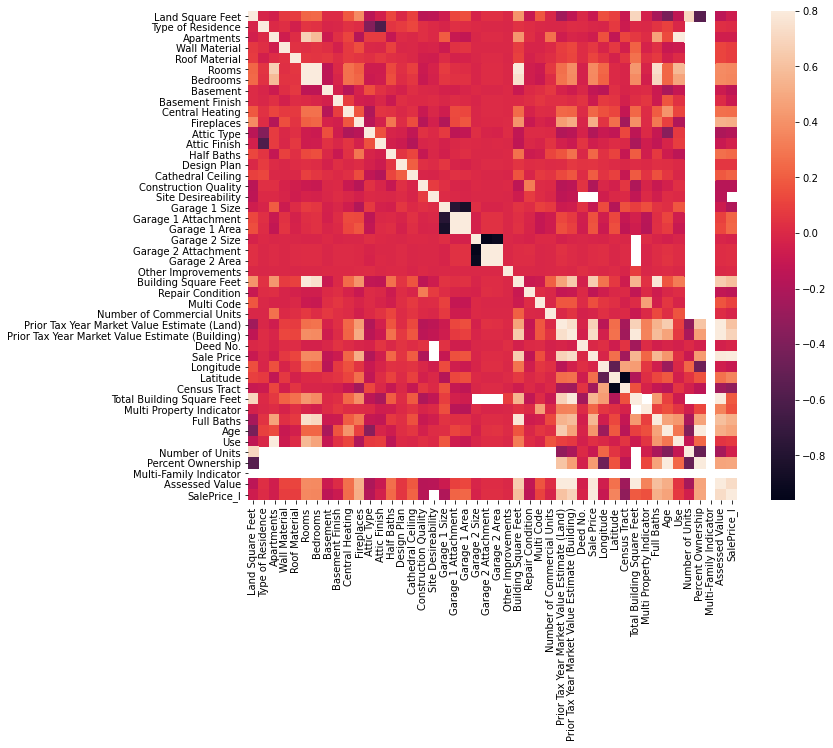

In [384]:
# Ajue la hpta, que bacaneria papaaaa
# Ahora veamos las correlaciones entre variables: SOPA DE PLASMA
corrmat = parcels._get_numeric_data().corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);